## DATA CLEANING OUR SCRAPED DATA

In [62]:
# import various libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
import unicodedata
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Working on the Mens Categories

In [63]:
men_acces = pd.read_csv("mensaccessories.csv")
men_acces.head()

,description,original_price,discount,reviews,ratings,sale,soldout,product_price
0,Kiondo Everyday Multicolored Beaded Belt - Brown,NaN,NaN,No reviews,0.0,NaN,Available,"KSh4,500.00"
1,Kiondo Everyday Multicolored Beaded Belt - Brown,NaN,NaN,No reviews,0.0,NaN,Available,"KSh4,500.00"
2,Kiondo Everyday Beaded Belt - Brown,NaN,NaN,No reviews,0.0,NaN,Available,"KSh4,500.00"
3,Mandevu Beard Care Set,NaN,NaN,No reviews,0.0,NaN,Available,"KSh6,000.00"
4,King's Collection Men's Boxers (2 Pack) - Blac...,"KSh1,250.00",15.0,No reviews,0.0,NaN,Sold out,"KSh1,250.00"


In [64]:
category_values = ["mens accessories"] * len(men_acces)
men_acces = men_acces.assign(category=category_values)

In [65]:
def add_column (data,columnname ):
    df = pd.read_csv(data)
    cat_values = [columnname] * len(df)
    df = df .assign(category = cat_values)
    
    return df

# calling the function
men_bottom = add_column ("mensbottoms.csv","mens bottoms")
men_bottom.head()

,description,original_price,discount,reviews,ratings,sale,soldout,product_price,category
0,Zetu Men's Surf Line Swim Shorts - Blue,"KSh2,550.00",30,No reviews,0.0,Sale,Available,"KSh2,550.00",mens bottoms
1,Zetu Men's 'Make Yourself...' Shorts - Grey,"KSh1,800.00",30,No reviews,0.0,Sale,Available,"KSh1,800.00",mens bottoms
2,Zetu Men's Diagonal Line Textured Shorts - White,"KSh1,800.00",30,No reviews,0.0,Sale,Available,"KSh1,800.00",mens bottoms
3,Zetu Men's Diagonal Line Textured Shorts - Grey,"KSh1,800.00",30,No reviews,0.0,Sale,Available,"KSh1,800.00",mens bottoms
4,Zetu Men's Square Textured Shorts - Grey,"KSh1,800.00",30,1 review,5.0,Sale,Available,"KSh1,800.00",mens bottoms


In [66]:
# Adding mens shirt to the  category column
men_shirt = add_column("menshirts&tshirts.csv","men shirts")
 # Adding  footwear to the category column
men_footwear = add_column('mensfootwear.csv', "mens footwear")
# Adding suits to the category column
men_suit = add_column("mensuits.csv", "mens suits")
# Adding outwear  to the category column
men_outwear = add_column("mensouterwear.csv", "mens outwear")


In [67]:
# concating the dfs into one main men dataframe
dfs = [men_outwear,men_suit,men_footwear,men_shirt,men_acces,men_bottom]

df_men = pd.concat(dfs)

df_men

,description,original_price,discount,reviews,ratings,sale,soldout,product_price,category
0,King's Collection Unisex Premium Hoodie - Prus...,"KSh1,750.00",15.0,1 review,5.0,NaN,Sold out,"KSh1,750.00",mens outwear
1,Ancestral House Ankara Mix Jacket - Black,NaN,NaN,No reviews,0.0,NaN,Available,"KSh12,672.00",mens outwear
2,King's Collection Unisex Premium Hoodie - Dark...,"KSh1,750.00",15.0,No reviews,0.0,Sale,Available,"KSh1,750.00",mens outwear
3,Zola SpringField Sweater - Grey,"KSh9,500.00",15.0,No reviews,0.0,Sale,Available,"KSh9,500.00",mens outwear
4,Phase Brands Galaxy Hoodie - White,NaN,NaN,No reviews,0.0,NaN,Available,"KSh3,200.00",mens outwear
...,...,...,...,...,...,...,...,...,...
36,King's Collection Unisex Straight Leg Joggers ...,"KSh1,650.00",15,No reviews,0.0,Sale,Available,"KSh1,650.00",mens bottoms
37,King's Collection Unisex Straight Leg Joggers ...,"KSh1,650.00",15,No reviews,0.0,Sale,Available,"KSh1,650.00",mens bottoms
38,King's Collection Unisex Cuffed Joggers - Black,"KSh1,650.00",15,No reviews,0.0,Sale,Available,"KSh1,650.00",mens bottoms
39,King's Collection Unisex Cuffed Joggers - Navy...,"KSh1,650.00",15,No reviews,0.0,Sale,Available,"KSh1,650.00",mens bottoms


### Working on the women df

In [68]:
# Adding womens bottoms to the category
wbottom = add_column("womenbottom.csv", "women bottom")
# Adding womens dress to the category
wdress = add_column("womendress.csv", "women dress")
# Adding womens footwear  to the category
wfootwear = add_column("womenfootwear.csv", "women footwear")
# Adding  womens outwear to the category column
woutwear = add_column("womenouterwear.csv", "women outwear")
# Adding womens accesories to the category column
waccess = add_column("womensaccesories.csv", "womens accessories")
# Adding  womens innerwear to the  category column
winner = add_column("womensinnerwears.csv","womens innerwears")
# Adding skirts to the category column
skirts = add_column("womenskirts.csv", "women skirts")
# Adding makeup to the category column
make_up =add_column("womensmakeup.csv", "womens makeup")
# Adding womens top to the category column
wtop = add_column("womentop.csv", "women top")

# Concating the dfs into one women dataframe
frames = [wbottom,wdress,wfootwear,woutwear,waccess,winner,skirts,make_up,wtop]
 
df_women = pd.concat(frames)
df_women


,description,original_price,discount,reviews,ratings,sale,soldout,product_price,category
0,PlainChic Box Pleat Palazzo Pants - Pink,NaN,NaN,2 reviews,3.00,NaN,Available,"KSh3,200.00",women bottom
1,PlainChic Box Pleat Palazzo Pants - Brown,NaN,NaN,1 review,1.00,NaN,Available,"KSh3,200.00",women bottom
2,PlainChic Culosuit - Black,NaN,NaN,No reviews,0.00,NaN,Available,"KSh3,950.00",women bottom
3,Salok Havilah Masha Jumpsuits - Green,"KSh4,750.00",20.0,3 reviews,3.67,Sale,Available,"KSh4,750.00",women bottom
4,Vivo Basic Straight Leg Pants - Burgundy,NaN,NaN,3 reviews,5.00,NaN,Sold out,"KSh3,550.00",women bottom
...,...,...,...,...,...,...,...,...,...
468,Urban Zen Cut Out Side Tie Maxi Top - Dark Red,"KSh1,950.00",50.0,No reviews,0.00,Sale,Available,"KSh1,950.00",women top
469,Urban Zen One Shoulder Long Sleeve Bodysuit - ...,"KSh1,250.00",50.0,No reviews,0.00,Sale,Available,"KSh1,250.00",women top
470,Purple Earth J Crew One-Shoulder Ruffle Eyelet...,NaN,NaN,No reviews,0.00,NaN,Available,"KSh3,950.00",women top
471,ForKeeps Satin Paisley Print Bodysuit - Taupe ...,NaN,NaN,No reviews,0.00,NaN,Available,"KSh2,500.00",women top


###  Unisex

In [69]:
# Adding unisex items to the category
cleaners = add_column("cleaners and soap.csv", "cleanersandsoaps")
deos = add_column("deosandlotin.csv","deosandlotion")
haircare = add_column("haircare.csv","haircare")
moist = add_column("moisturizers and cream.csv", "moisturizers and cream")
toners = add_column("toners and treatments.csv", " toners and treatments")
unisex = add_column("unisex fragrance.csv", "unisex fragrance")


frames =[cleaners,deos,haircare,moist,toners,unisex]

df_unisex = pd.concat(frames)
df_unisex.reset_index()


,index,description,original_price,discount,reviews,ratings,sale,soldout,product_price,category
0,0,Phase Brands Baylis & Harding Black Pepper & G...,NaN,NaN,No reviews,0.0,NaN,Available,"KSh3,200.00",cleanersandsoaps
1,1,Phase Brands Baylis & Harding Royale Garden,NaN,NaN,No reviews,0.0,NaN,Available,"KSh5,500.00",cleanersandsoaps
2,2,Phase Brands Baylis & Harding Royale Garden,NaN,NaN,No reviews,0.0,NaN,Available,"KSh5,100.00",cleanersandsoaps
3,3,Phase Brands Baylis & Harding Boudoire Rose,NaN,NaN,No reviews,0.0,NaN,Available,"KSh5,000.00",cleanersandsoaps
4,4,Phase Brands Baylis & Harding Signature Collec...,NaN,NaN,No reviews,0.0,NaN,Available,"KSh5,200.00",cleanersandsoaps
...,...,...,...,...,...,...,...,...,...,...
152,6,Mandevu Beard Balm,"KSh1,400.00",20.0,1 review,5.0,Sale,Available,"KSh1,400.00",toners and treatments
153,0,Ythera Frangipani Fine Fragrance Mist,NaN,NaN,1 review,5.0,NaN,Available,KSh750.00,unisex fragrance
154,1,Ythera Malaika Fine Fragrance Mist,NaN,NaN,No reviews,0.0,NaN,Sold out,KSh750.00,unisex fragrance
155,2,Kipusa Hello Aura Sweet Vanilla Cream Scented ...,NaN,NaN,No reviews,0.0,NaN,Available,"KSh4,000.00",unisex fragrance


### ***Merging the dataframes to make one main dataframe***

In [70]:
#Merging the three dataframes
dfs = [df_men,df_women,df_unisex]

df_main = pd.concat(dfs)
df_main

,description,original_price,discount,reviews,ratings,sale,soldout,product_price,category
0,King's Collection Unisex Premium Hoodie - Prus...,"KSh1,750.00",15.0,1 review,5.0,NaN,Sold out,"KSh1,750.00",mens outwear
1,Ancestral House Ankara Mix Jacket - Black,NaN,NaN,No reviews,0.0,NaN,Available,"KSh12,672.00",mens outwear
2,King's Collection Unisex Premium Hoodie - Dark...,"KSh1,750.00",15.0,No reviews,0.0,Sale,Available,"KSh1,750.00",mens outwear
3,Zola SpringField Sweater - Grey,"KSh9,500.00",15.0,No reviews,0.0,Sale,Available,"KSh9,500.00",mens outwear
4,Phase Brands Galaxy Hoodie - White,NaN,NaN,No reviews,0.0,NaN,Available,"KSh3,200.00",mens outwear
...,...,...,...,...,...,...,...,...,...
6,Mandevu Beard Balm,"KSh1,400.00",20.0,1 review,5.0,Sale,Available,"KSh1,400.00",toners and treatments
0,Ythera Frangipani Fine Fragrance Mist,NaN,NaN,1 review,5.0,NaN,Available,KSh750.00,unisex fragrance
1,Ythera Malaika Fine Fragrance Mist,NaN,NaN,No reviews,0.0,NaN,Sold out,KSh750.00,unisex fragrance
2,Kipusa Hello Aura Sweet Vanilla Cream Scented ...,NaN,NaN,No reviews,0.0,NaN,Available,"KSh4,000.00",unisex fragrance


In [71]:
df_main['ratings'].value_counts()

0.0        3230
5.0         210
0.00        199
4.0          34
3.0          24
1.0          14
5.00         11
4.67          8
4.5           6
3.5           5
2.0           4
4.00          2
3.67          2
3.75          2
4.8           2
3.8           2
4.33          2
4.75          2
ratings       1
4.25          1
2.5           1
4.4           1
Name: ratings, dtype: int64

#### **Data Cleaning**

In [72]:
# checking the data types
df_main.dtypes

description       object
original_price    object
discount          object
reviews           object
ratings           object
sale              object
soldout           object
product_price     object
category          object
dtype: object

In [73]:
df_main['sale'].value_counts()

Sale    1942
sale       1
Name: sale, dtype: int64

In [74]:
# replacing the word ratings and discount  in our df 
df_main['ratings'] = df_main['ratings'].replace('ratings', 0.0)
df_main['discount'] = df_main['discount'].replace('discount',0)
df_main['product_price'] = df_main['product_price'].replace('product_price',0)
df_main['sale'] = df_main['sale'].replace("sale","Sale")
df_main['soldout'] = df_main['soldout'].replace('soldout','Sold out')

In [75]:
# Converting product price into a string and cleaning it
df_main['product_price'] = df_main['product_price'].str.replace('KSh', '').str.replace(',', '').str.strip()

# Removing any non-numeric characters from product_price
df_main['product_price'] = df_main['product_price'].astype(float)

In [76]:
# replacing the word ratings and discount  in our df 





In [77]:
df_main['ratings'].value_counts()

0.0     3231
5.0      210
0.00     199
4.0       34
3.0       24
1.0       14
5.00      11
4.67       8
4.5        6
3.5        5
2.0        4
4.00       2
3.67       2
3.75       2
4.8        2
3.8        2
4.33       2
4.75       2
4.25       1
2.5        1
4.4        1
Name: ratings, dtype: int64

In [78]:
# changing their data types  into the correct format
# converting product price into integer
# Converting product price into a string and cleaning it


# Cleaning the ratings column and converting it to float
df_main['ratings'] = df_main['ratings'].astype(float)
# converting discount into a float
df_main["discount"] = df_main['discount'].astype(float)
# converting description into a string
df_main['description'] = df_main['description'].astype('string')
# converting  reviews column into a string
#df_main['reviews'] = df_main["reviews"].astype('string')
# converting sale column into a string
df_main["sale"] = df_main["sale"].astype('string')
# converting soldout column into a string
df_main['soldout'] = df_main['soldout'].astype('string')



In [79]:
## Checking for missing values
def missing (df):
    """A function to check for missing values and their percentage of the data set"""
    print("Missing values per column")
    #check for missing values per column
    missing =df.isna().sum()
    print(missing)
    # check for percentage of missing values
    
    print("Percentage of missing values")
    percent_mis =round((missing/len(df)) * 100,1)
    print(percent_mis)
    
    

# Calling the function
missing(df_main)


Missing values per column
description          0
original_price    1734
discount          1734
reviews              0
ratings              0
sale              1820
soldout              0
product_price        1
category             0
dtype: int64
Percentage of missing values
description        0.0
original_price    46.1
discount          46.1
reviews            0.0
ratings            0.0
sale              48.4
soldout            0.0
product_price      0.0
category           0.0
dtype: float64


In [80]:
# dropping the original price since 
df_main.drop(columns="original_price",axis=1,inplace = True)

df_main.head()

,description,discount,reviews,ratings,sale,soldout,product_price,category
0,King's Collection Unisex Premium Hoodie - Prus...,15.0,1 review,5.0,<NA>,Sold out,1750.0,mens outwear
1,Ancestral House Ankara Mix Jacket - Black,NaN,No reviews,0.0,<NA>,Available,12672.0,mens outwear
2,King's Collection Unisex Premium Hoodie - Dark...,15.0,No reviews,0.0,Sale,Available,1750.0,mens outwear
3,Zola SpringField Sweater - Grey,15.0,No reviews,0.0,Sale,Available,9500.0,mens outwear
4,Phase Brands Galaxy Hoodie - White,NaN,No reviews,0.0,<NA>,Available,3200.0,mens outwear


In [81]:
# Replacing of missing values

# filling the discount column with 0
df_main["discount"].fillna(0,inplace=True)

# filling the sale NaNS with "not on sale"
df_main["sale"].fillna("Not on Sale",inplace = True)

# 


# checking if our missing values were dropped
df_main.isna().sum()

description      0
discount         0
reviews          0
ratings          0
sale             0
soldout          0
product_price    1
category         0
dtype: int64

In [82]:
df_main

,description,discount,reviews,ratings,sale,soldout,product_price,category
0,King's Collection Unisex Premium Hoodie - Prus...,15.0,1 review,5.0,Not on Sale,Sold out,1750.0,mens outwear
1,Ancestral House Ankara Mix Jacket - Black,0.0,No reviews,0.0,Not on Sale,Available,12672.0,mens outwear
2,King's Collection Unisex Premium Hoodie - Dark...,15.0,No reviews,0.0,Sale,Available,1750.0,mens outwear
3,Zola SpringField Sweater - Grey,15.0,No reviews,0.0,Sale,Available,9500.0,mens outwear
4,Phase Brands Galaxy Hoodie - White,0.0,No reviews,0.0,Not on Sale,Available,3200.0,mens outwear
...,...,...,...,...,...,...,...,...
6,Mandevu Beard Balm,20.0,1 review,5.0,Sale,Available,1400.0,toners and treatments
0,Ythera Frangipani Fine Fragrance Mist,0.0,1 review,5.0,Not on Sale,Available,750.0,unisex fragrance
1,Ythera Malaika Fine Fragrance Mist,0.0,No reviews,0.0,Not on Sale,Sold out,750.0,unisex fragrance
2,Kipusa Hello Aura Sweet Vanilla Cream Scented ...,0.0,No reviews,0.0,Not on Sale,Available,4000.0,unisex fragrance


In [83]:
# checking for duplicates
df_main.duplicated().sum()

100

In [84]:
df_main.drop_duplicates(inplace=True)

In [85]:
df_main.duplicated().sum()

0

In [86]:
df_main

,description,discount,reviews,ratings,sale,soldout,product_price,category
0,King's Collection Unisex Premium Hoodie - Prus...,15.0,1 review,5.0,Not on Sale,Sold out,1750.0,mens outwear
1,Ancestral House Ankara Mix Jacket - Black,0.0,No reviews,0.0,Not on Sale,Available,12672.0,mens outwear
2,King's Collection Unisex Premium Hoodie - Dark...,15.0,No reviews,0.0,Sale,Available,1750.0,mens outwear
3,Zola SpringField Sweater - Grey,15.0,No reviews,0.0,Sale,Available,9500.0,mens outwear
4,Phase Brands Galaxy Hoodie - White,0.0,No reviews,0.0,Not on Sale,Available,3200.0,mens outwear
...,...,...,...,...,...,...,...,...
6,Mandevu Beard Balm,20.0,1 review,5.0,Sale,Available,1400.0,toners and treatments
0,Ythera Frangipani Fine Fragrance Mist,0.0,1 review,5.0,Not on Sale,Available,750.0,unisex fragrance
1,Ythera Malaika Fine Fragrance Mist,0.0,No reviews,0.0,Not on Sale,Sold out,750.0,unisex fragrance
2,Kipusa Hello Aura Sweet Vanilla Cream Scented ...,0.0,No reviews,0.0,Not on Sale,Available,4000.0,unisex fragrance


In [87]:
# Cleaning the reviews column 
# Cleaning the reviews column
df_main["reviews"] = df_main["reviews"].str.replace('reviews', '').str.replace('review','').str.replace('No','0').str.strip()

df_main.head()

,description,discount,reviews,ratings,sale,soldout,product_price,category
0,King's Collection Unisex Premium Hoodie - Prus...,15.0,1,5.0,Not on Sale,Sold out,1750.0,mens outwear
1,Ancestral House Ankara Mix Jacket - Black,0.0,0,0.0,Not on Sale,Available,12672.0,mens outwear
2,King's Collection Unisex Premium Hoodie - Dark...,15.0,0,0.0,Sale,Available,1750.0,mens outwear
3,Zola SpringField Sweater - Grey,15.0,0,0.0,Sale,Available,9500.0,mens outwear
4,Phase Brands Galaxy Hoodie - White,0.0,0,0.0,Not on Sale,Available,3200.0,mens outwear


### **Feature engineering**

 Creating new columns from the exiting data

In [88]:
# creating the discounted price column
df_main["discount price"] = df_main["product_price"]- (df_main["product_price"] * df_main["discount"])/100

df_main.head()

,description,discount,reviews,ratings,sale,soldout,product_price,category,discount price
0,King's Collection Unisex Premium Hoodie - Prus...,15.0,1,5.0,Not on Sale,Sold out,1750.0,mens outwear,1487.5
1,Ancestral House Ankara Mix Jacket - Black,0.0,0,0.0,Not on Sale,Available,12672.0,mens outwear,12672.0
2,King's Collection Unisex Premium Hoodie - Dark...,15.0,0,0.0,Sale,Available,1750.0,mens outwear,1487.5
3,Zola SpringField Sweater - Grey,15.0,0,0.0,Sale,Available,9500.0,mens outwear,8075.0
4,Phase Brands Galaxy Hoodie - White,0.0,0,0.0,Not on Sale,Available,3200.0,mens outwear,3200.0


In [89]:
def gender(row):
    """A function that checks the gender using the category column"""
    if "mens" in row["category"]:
        return "Male"
    elif "women" in row["category"]:
        return "Female"
    else:
        return "Unisex"

df_main["gender"] = df_main.apply(gender, axis=1)
df_main["gender"].value_counts()


Female    2358
Male      1018
Unisex     287
Name: gender, dtype: int64

In [90]:
df_main.head()

,description,discount,reviews,ratings,sale,soldout,product_price,category,discount price,gender
0,King's Collection Unisex Premium Hoodie - Prus...,15.0,1,5.0,Not on Sale,Sold out,1750.0,mens outwear,1487.5,Male
1,Ancestral House Ankara Mix Jacket - Black,0.0,0,0.0,Not on Sale,Available,12672.0,mens outwear,12672.0,Male
2,King's Collection Unisex Premium Hoodie - Dark...,15.0,0,0.0,Sale,Available,1750.0,mens outwear,1487.5,Male
3,Zola SpringField Sweater - Grey,15.0,0,0.0,Sale,Available,9500.0,mens outwear,8075.0,Male
4,Phase Brands Galaxy Hoodie - White,0.0,0,0.0,Not on Sale,Available,3200.0,mens outwear,3200.0,Male


In [91]:
# saving data to csv for analysis in Tableau
df_main.to_csv("ShopZetu.csv")

## **Exploratory Data Analysis**
We will conduct both univariate  and bivariate analysis

In [92]:
df_main["discount"].value_counts()

0.0     1717
20.0     453
30.0     398
10.0     284
50.0     180
15.0     178
25.0      82
40.0      31
17.0      25
24.0      20
16.0      18
33.0      17
60.0      16
57.0      15
47.0      15
13.0      13
5.0       13
22.0      13
27.0      11
8.0       10
14.0       9
43.0       9
28.0       8
26.0       8
31.0       8
44.0       8
61.0       8
35.0       8
9.0        8
19.0       8
53.0       7
21.0       5
32.0       5
70.0       5
6.0        5
11.0       4
29.0       4
85.0       4
38.0       4
7.0        4
34.0       3
37.0       3
3.0        3
49.0       2
46.0       2
58.0       2
97.0       2
23.0       1
56.0       1
42.0       1
64.0       1
55.0       1
39.0       1
36.0       1
12.0       1
Name: discount, dtype: int64

### **Univariate Analysis**

In [93]:
# A function that plots bargraphs
def countplot(data,column):
    plt.figure(figsize=(10,5))
    sns.countplot(x=column,data=data,order=data[column].value_counts().index[:20])
    plt.title(f'{column} count plot')
    plt.ylabel('count')
    plt.xticks(rotation= 90)
    plt.show
    
# A function that plots doughnot plot
def doughnut(data,column):
    count=data[column].value_counts()
    plt.figure(figsize=(10,8))
    c='lightblue','orange'
    mylabels='No','Yes'
    plt.pie(count,labels=mylabels,colors=c,autopct='%1.1f%%', pctdistance=0.85)
    # draw circle
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    # Adding Circle in Pie chart
    fig.gca().add_artist(centre_circle)
    plt.title(f'{column}')

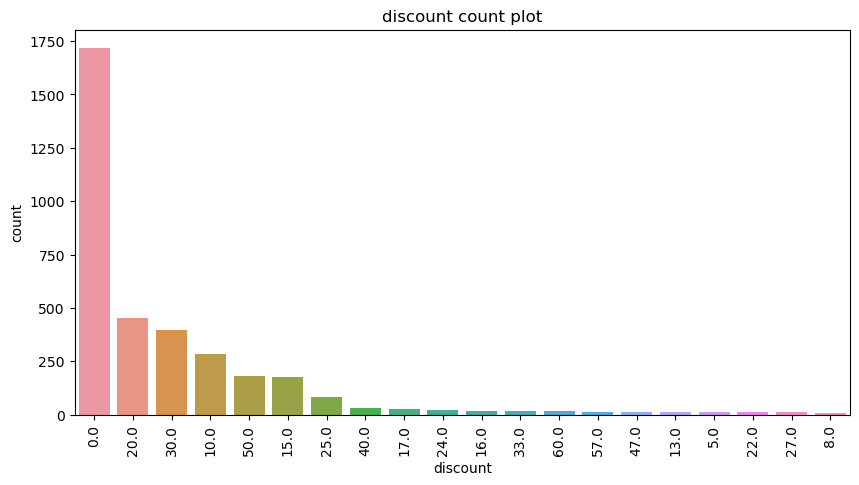

In [94]:
countplot(df_main,"discount")

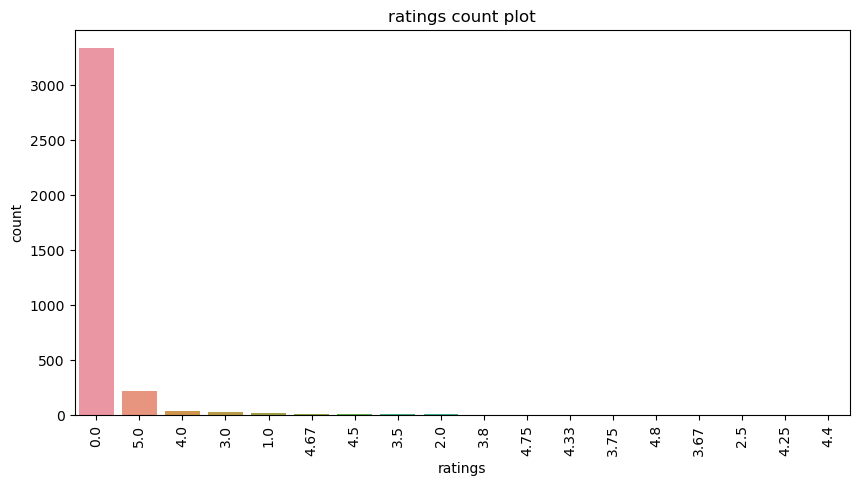

In [95]:
countplot(df_main,"ratings")

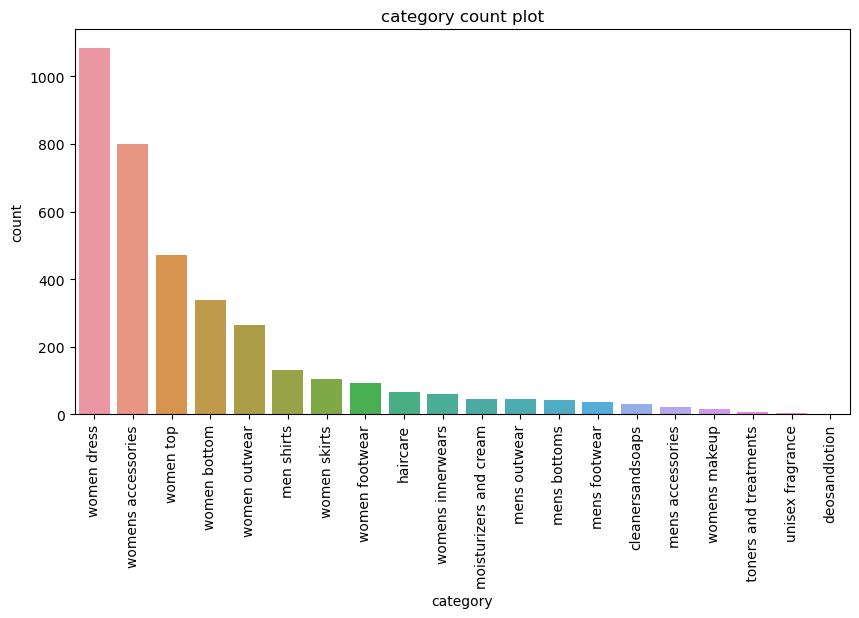

In [96]:
countplot(df_main,"category")

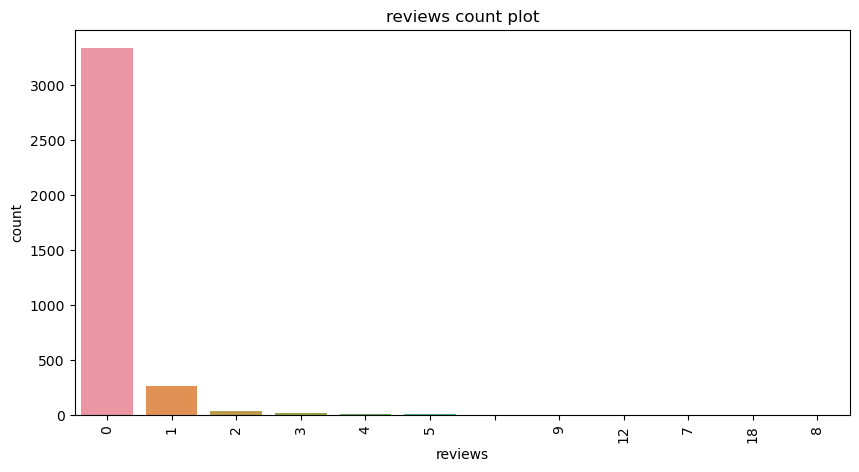

In [97]:
countplot(df_main,"reviews")

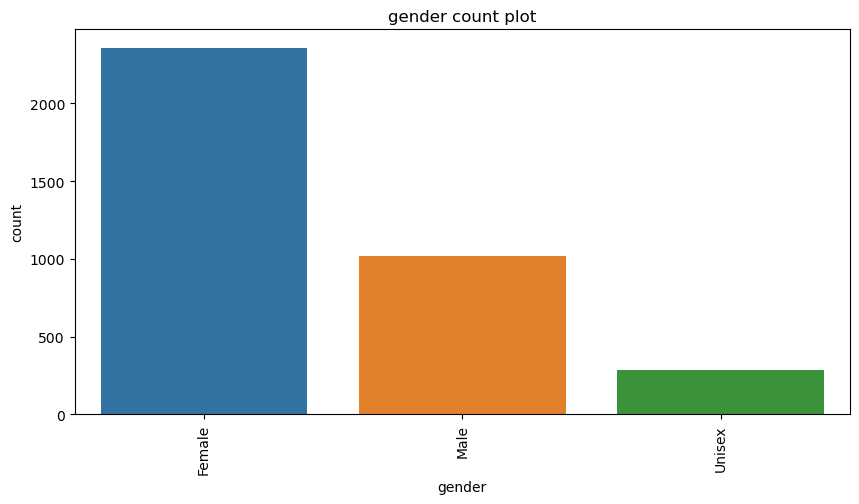

In [98]:
countplot(df_main,'gender')

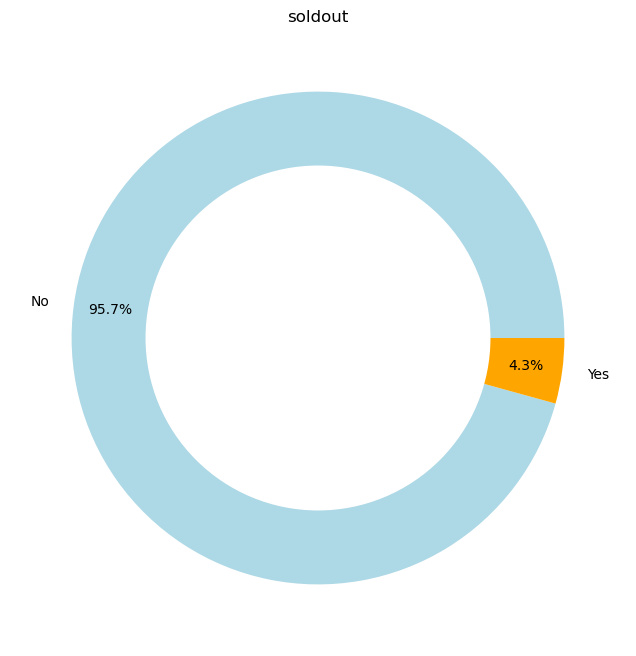

In [99]:
doughnut(df_main,'soldout')

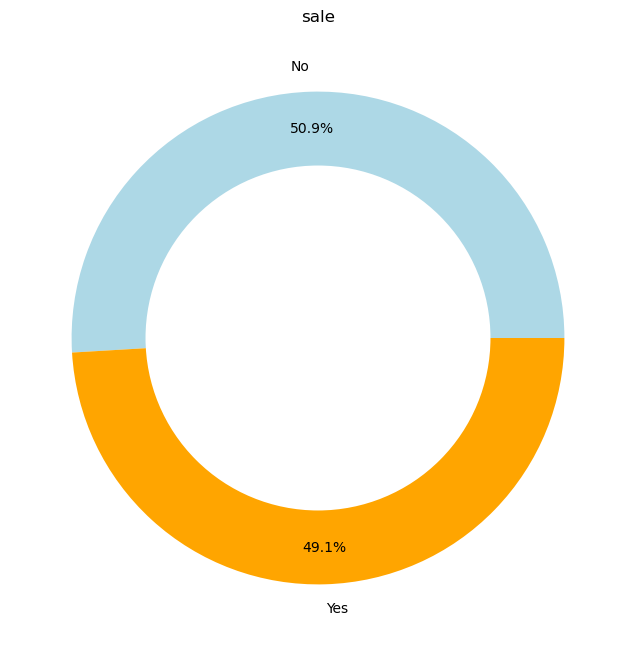

In [100]:
doughnut(df_main,"sale")

### **Bivariate Analysis**

In [101]:
df_main.head()

,description,discount,reviews,ratings,sale,soldout,product_price,category,discount price,gender
0,King's Collection Unisex Premium Hoodie - Prus...,15.0,1,5.0,Not on Sale,Sold out,1750.0,mens outwear,1487.5,Male
1,Ancestral House Ankara Mix Jacket - Black,0.0,0,0.0,Not on Sale,Available,12672.0,mens outwear,12672.0,Male
2,King's Collection Unisex Premium Hoodie - Dark...,15.0,0,0.0,Sale,Available,1750.0,mens outwear,1487.5,Male
3,Zola SpringField Sweater - Grey,15.0,0,0.0,Sale,Available,9500.0,mens outwear,8075.0,Male
4,Phase Brands Galaxy Hoodie - White,0.0,0,0.0,Not on Sale,Available,3200.0,mens outwear,3200.0,Male


In [102]:
def  graph ( df,col1,col2):
    data = df.groupby([col1])[col2].sum().sort_values(ascending=False).head(10)
    plt.barh(data.index,data)
    plt.title(f"{col1} by {col2} ")
    
    
def scatter_plot(df,col1,col2):
    plt.scatter(x = df[col1],y=df[col2])
    plt.title(f'Relationship between {col1} and {col2}')

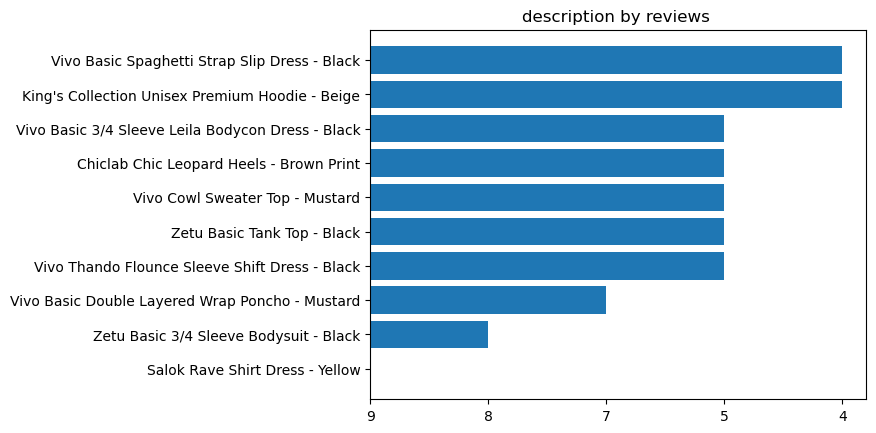

In [103]:
graph(df_main,"description","reviews")

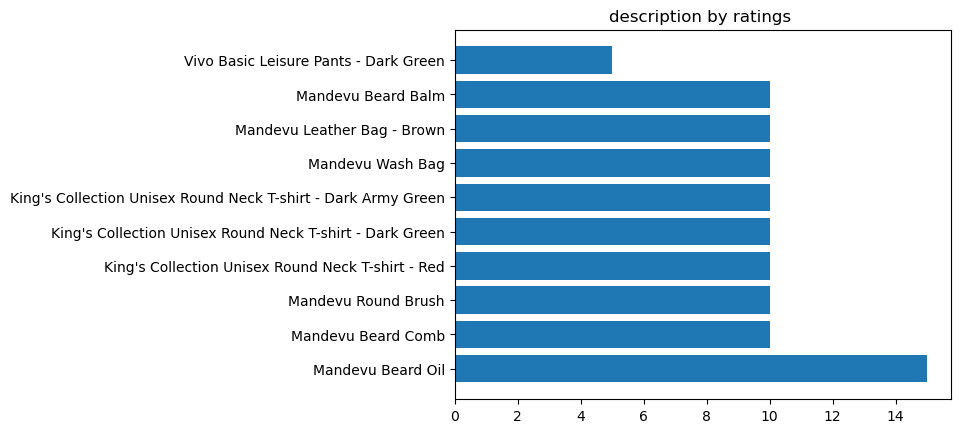

In [104]:
graph(df_main,"description","ratings")

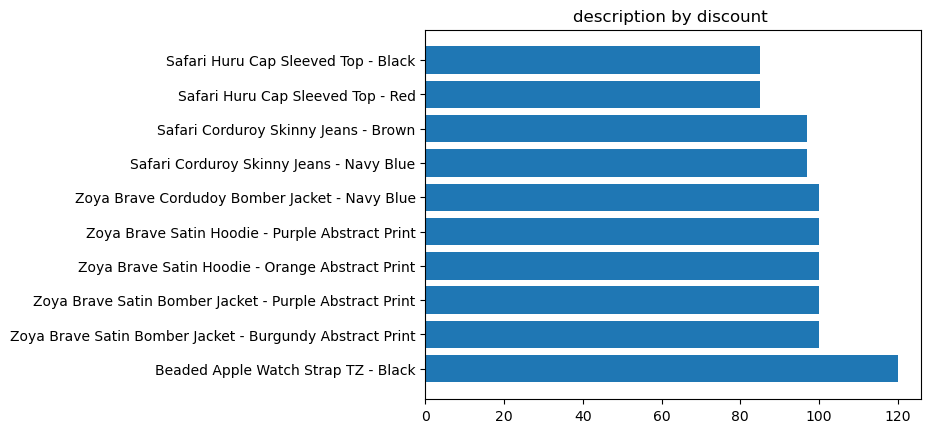

In [105]:
graph(df_main,"description","discount")

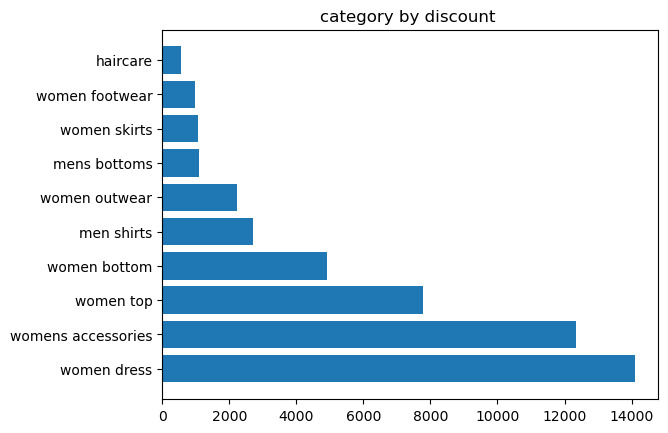

In [106]:
graph(df_main,'category',"discount")

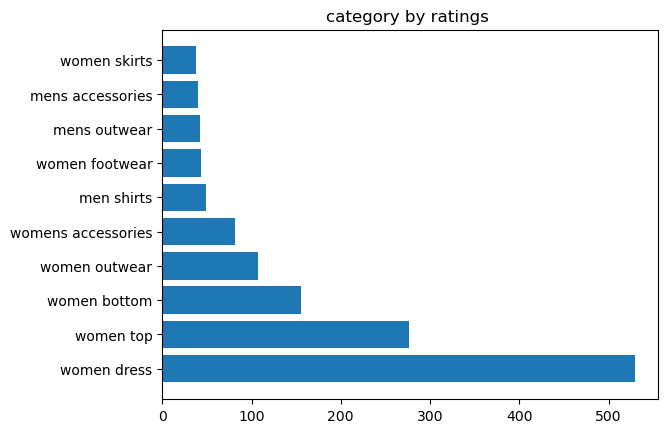

In [107]:
graph(df_main,"category","ratings")

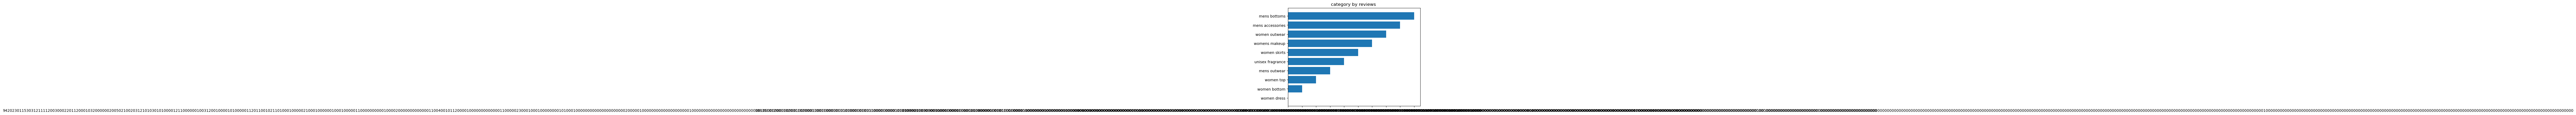

In [108]:
graph(df_main,"category","reviews")

### **Building a Recommendation system**

### **Creating TD-IDF VECTORIZER**

In [109]:
df_main['product'] = df_main["description"]
df_main.head()

,description,discount,reviews,ratings,sale,soldout,product_price,category,discount price,gender,product
0,King's Collection Unisex Premium Hoodie - Prus...,15.0,1,5.0,Not on Sale,Sold out,1750.0,mens outwear,1487.5,Male,King's Collection Unisex Premium Hoodie - Prus...
1,Ancestral House Ankara Mix Jacket - Black,0.0,0,0.0,Not on Sale,Available,12672.0,mens outwear,12672.0,Male,Ancestral House Ankara Mix Jacket - Black
2,King's Collection Unisex Premium Hoodie - Dark...,15.0,0,0.0,Sale,Available,1750.0,mens outwear,1487.5,Male,King's Collection Unisex Premium Hoodie - Dark...
3,Zola SpringField Sweater - Grey,15.0,0,0.0,Sale,Available,9500.0,mens outwear,8075.0,Male,Zola SpringField Sweater - Grey
4,Phase Brands Galaxy Hoodie - White,0.0,0,0.0,Not on Sale,Available,3200.0,mens outwear,3200.0,Male,Phase Brands Galaxy Hoodie - White


In [110]:
punct_list = list(string.punctuation)
def lowercase(text):
    """A function that  lowercases texts characters """
    return text.lower()

# punctuations
regular_punct = list(string.punctuation)
def remove_punctuation(text,punct_list):
    """A function that removes punctuation"""
    for punc in punct_list:
        if punc in text:
            text = text.replace(punc, ' ')
    return text.strip()

 # A function that removes numbers   
def remove_small_words(text):
    
    """This function removes words with length 1 or 2"""
    clean = re.compile(r'\b\w{1,2}\b')
        
    return re.sub(clean, '', text)
# A function that removes special characters
def remove_special_characters(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Normalize unicode characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # Tokenize the text into individual words
    tokens = word_tokenize(text)
    
    # Remove special characters using regular expressions and keep only alphanumeric characters
    pattern = re.compile(r'[\W_]+')
    filtered_tokens = [token for token in tokens if not pattern.match(token)]
    
    # Join the filtered tokens back into a single text
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text

In [111]:


# Text cleaning on the  About Column
df_main["product"] = df_main["product"].apply(lambda x : lowercase(x))
df_main["product"] = df_main["product"].apply (lambda x : remove_punctuation(x,punct_list))
df_main["product"] = df_main["product"].apply(lambda x : remove_special_characters(x))

df_main["description"] = df_main["description"].apply(lambda x : remove_punctuation(x,punct_list))

In [122]:
df_main.to_csv("shopetu.csv")

In [113]:
# importing the  vectorizer

vect = TfidfVectorizer( stop_words='english')

#creating the vectorizer matrix

vect_matrix = vect.fit_transform(df_main['product'])

# checking the  shape of our matrix
vect_matrix.shape

(3663, 2275)

In [114]:
# calculating the cosine similarities
cosine_sim = cosine_similarity(vect_matrix,vect_matrix)
cosine_sim[0]

array([1.        , 0.        , 0.71238113, ..., 0.        , 0.        ,
       0.        ])

In [115]:
indices = pd.Series(df_main.index, index = df_main["description"])
indices = indices[~indices.index.duplicated(keep ='last')]
indices

description
King s Collection Unisex Premium Hoodie   Prussian Blue    0
Ancestral House Ankara Mix Jacket   Black                  1
King s Collection Unisex Premium Hoodie   Dark Beige       2
Zola SpringField Sweater   Grey                            3
Zola Classy Checked Cardigan   Grey                        8
                                                          ..
Mandevu Beard Balm                                         6
Ythera Frangipani Fine Fragrance Mist                      0
Ythera Malaika Fine Fragrance Mist                         1
Kipusa Hello Aura Sweet Vanilla Cream Scented Candle       2
Kipusa Hello Aura Orchard Scented Candle                   3
Length: 3601, dtype: int64

In [116]:
product_index = indices['Ancestral House Ankara Mix Jacket   Black']
product_index

1

In [117]:
# getting the cosine similarity based on the product index
cosine_sim[product_index]

array([0., 1., 0., ..., 0., 0., 0.])

In [118]:
## Creating a dataframe using th
similarity_scores = pd.DataFrame(cosine_sim[product_index],columns = ["score"])
similarity_scores

,score
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
3658,0.0
3659,0.0
3660,0.0
3661,0.0


In [119]:
product_indices = similarity_scores.sort_values("score",ascending=False)[0:5].index
df_main["description"].iloc[product_indices]

1            Ancestral House Ankara Mix Jacket   Black
8                     Ancestral House Two Piece   Blue
39            Ancestral House DD Collage Jacket   Grey
846    Simbaress Ankara Mix Lulea Dress   Black   Blue
13             Zola Ankara Bomber Jacket   Blue Ankara
Name: description, dtype: object

In [120]:
def recommender (description,df = df_main):
    # importing TfidfVectorizer
    tfidf = TfidfVectorizer(stop_words='english')

    # filling null in the about column
    # creating the TF -IDF using the    About
    tfidf_matrix = tfidf.fit_transform(df["product"])
    # Calculating the cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)
    # getting the indices
    indices = pd.Series(df.index, index = df["description"])
    indices = indices[~indices.index.duplicated(keep ='last')]
    product_index =indices[description]
    # Creating a DataFframe based on the cosine similarity
    similarity_scores = pd.DataFrame(cosine_sim[product_index],columns = ["score"])
    product_indices = similarity_scores.sort_values("score",ascending=False)[0:5].index
    # using the indices and score to recommend products
    return df["description"].iloc[product_indices]

In [121]:
recommender('Zola Classy Checked Cardigan   Grey')

8                    Zola Classy Checked Cardigan   Grey
60                            Zola Checked Heels   Black
557                      Lizola Classy Sunglasses   Blue
1037    Elan Fashions Grey Checked Dress   Black   Green
43      Tuli Zola Diamond Print Cardigan   Black   White
Name: description, dtype: object